In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import keras

In [ ]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/train/
   creating: Dataset/train/EarlyBlight/
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_100.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1000.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1002.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1004.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1005.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1006.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1007.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1008.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1009.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1011.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1012.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1013.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1014.jpg  
  inflating: Dataset/train/EarlyBligh

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data = keras.preprocessing.image_dataset_from_directory(
    '/content/Dataset/train',
    batch_size = 70,
    image_size =(240,240),

    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.15,
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    '/content/Dataset/val',
    batch_size = 70,
    image_size =(240,240),

    shuffle = True,
    seed =123,
    validation_split =0.15,
    subset ='validation',
    )

Found 3257 files belonging to 3 classes.
Using 2769 files for training.
Found 815 files belonging to 3 classes.
Using 122 files for validation.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [ ]:
resnet_model = Sequential()
pretrained_model= ResNet50(include_top=False,
                   input_shape=(240,240,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(10, activation='softmax'))

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
resnet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = resnet_model.fit(training_data,
                    steps_per_epoch=len(training_data),
                    epochs=30,
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/30
40/40 [==============================] - 36s 443ms/step - loss: 0.3977 - accuracy: 0.8913 - val_loss: 0.4670 - val_accuracy: 0.9262
Epoch 2/30
40/40 [==============================] - 10s 244ms/step - loss: 0.0601 - accuracy: 0.9783 - val_loss: 0.3133 - val_accuracy: 0.9508
Epoch 3/30
40/40 [==============================] - 10s 247ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.2486 - val_accuracy: 0.9508
Epoch 4/30
40/40 [==============================] - 10s 242ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.2490 - val_accuracy: 0.9344
Epoch 5/30
40/40 [==============================] - 10s 246ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.2251 - val_accuracy: 0.9426
Epoch 6/30
40/40 [==============================] - 11s 260ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.1683 - val_accuracy: 0.9672
Epoch 7/30
40/40 [==============================] - 10s 241ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.1820 - val_accuracy: 0.9672

Found 815 images belonging to 3 classes.
12/12 [==============================] - 4s 318ms/step
Precision: 0.9443536402437807
Recall: 0.943558282208589
F1 Score: 0.9433615305057043
Accuracy: 0.943558282208589

Confusion Matrix:
[[322   2   2]
 [  9 189   6]
 [  9  18 258]]


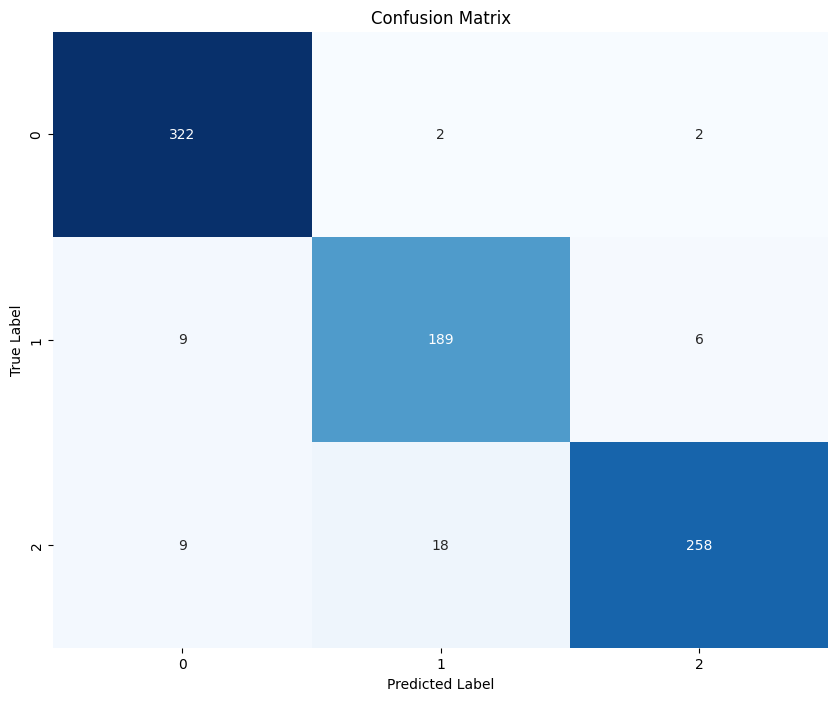

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (240, 240)
batch_size = 70
validation_generator = ImageDataGenerator().flow_from_directory(
    '/content/Dataset/val',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)
y_pred_prob = resnet_model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = validation_generator.classes
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)
acc=accuracy_score(y_true,y_pred)
print("Accuracy:",acc)
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
